In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ahdd1/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/csvTestLabel 10k x 1.csv
/kaggle/input/ahdd1/csvTrainLabel 60k x 1.csv
/kaggle/input/ahdd1/Train + Test Matlab.mat
/kaggle/input/ahdd1/csvTestImages 10k x 784.csv
/kaggle/input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv
/kaggle/input/ahdd1/Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv


**TO LOAD DATASET**

In [2]:
import pandas as pd

X_train = pd.read_csv("../input/ahdd1/csvTrainImages 60k x 784/csvTrainImages 60k x 784.csv").values
Y_train = pd.read_csv("../input/ahdd1/csvTrainLabel 60k x 1.csv").values
X_test = pd.read_csv("../input/ahdd1/csvTestImages 10k x 784.csv").values
Y_test = pd.read_csv("../input/ahdd1/csvTestLabel 10k x 1.csv").values

In [3]:
X_train.shape


(59999, 784)

In [4]:
Y_train.shape

(59999, 1)

**PREPROCESSING**

In [5]:
#scaling down to a range  between 0 and 1 [0,1]
X_train=X_train/255
X_test=X_test/255

**IMPORTING LIBRARIES**

In [6]:
import tensorflow as tf
from keras.utils import np_utils
from tensorflow import keras

In [7]:
from matplotlib import pyplot as plt
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))


Train: X=(59999, 784), y=(59999, 1)
Test: X=(9999, 784), y=(9999, 1)


**VISUALIZING 4TH IMAGE**

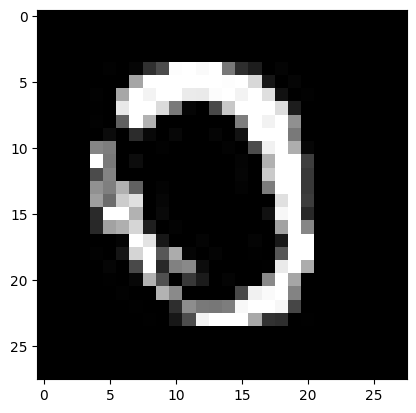

In [8]:
import matplotlib.pyplot as plt

first_image = X_train[4]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))

plt.imshow(pixels, cmap='gray')

plt.show()

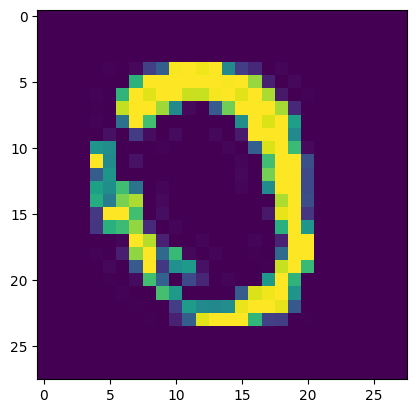

In [9]:
# Python 3 program to visualize 4th image
import matplotlib.pyplot as plt
import numpy as np
im1 = X_train.reshape(X_train.shape[0], 28, 28, 1)
im2 = X_test.reshape(X_test.shape[0], 28, 28, 1)

plt.imshow(X_train[4].reshape(28,28))


 **ONE HOT-ENCODING**

In [10]:

Y_train=tf.keras.utils.to_categorical(Y_train)

In [11]:
Y_test=tf.keras.utils.to_categorical(Y_test)

**BUILDING NN MODEL**

In [12]:
from keras.models import Sequential


In [13]:
from keras.layers import Dense

In [14]:
model=Sequential()

In [15]:
#NN architecture with 4 hidden layers
model.add(Dense(200, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

**MODEL COMPILATION**

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

**MODEL TRAINING AND TESTING**

In [17]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=10, batch_size=200, verbose=2)

Epoch 1/10
300/300 - 5s - loss: 0.2232 - accuracy: 0.9426 - val_loss: 0.1110 - val_accuracy: 0.9687 - 5s/epoch - 16ms/step
Epoch 2/10
300/300 - 3s - loss: 0.0639 - accuracy: 0.9824 - val_loss: 0.0840 - val_accuracy: 0.9746 - 3s/epoch - 10ms/step
Epoch 3/10
300/300 - 3s - loss: 0.0397 - accuracy: 0.9891 - val_loss: 0.0674 - val_accuracy: 0.9819 - 3s/epoch - 10ms/step
Epoch 4/10
300/300 - 3s - loss: 0.0270 - accuracy: 0.9924 - val_loss: 0.0659 - val_accuracy: 0.9815 - 3s/epoch - 10ms/step
Epoch 5/10
300/300 - 3s - loss: 0.0197 - accuracy: 0.9943 - val_loss: 0.0736 - val_accuracy: 0.9814 - 3s/epoch - 9ms/step
Epoch 6/10
300/300 - 3s - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0693 - val_accuracy: 0.9830 - 3s/epoch - 10ms/step
Epoch 7/10
300/300 - 3s - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.0699 - val_accuracy: 0.9827 - 3s/epoch - 10ms/step
Epoch 8/10
300/300 - 3s - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0729 - val_accuracy: 0.9814 - 3s/epoch - 9ms/step
Epoch 9/10
300/300

**EVALUATING THE SCORE**

In [18]:
scores=model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0796 - accuracy: 0.9823


In [19]:
scores[1]

0.9822982549667358

**DISPLAYING THE RESULT FOR RANDOM NUMBER**

1/1 [==============================] - 0s 127ms/step
3 3


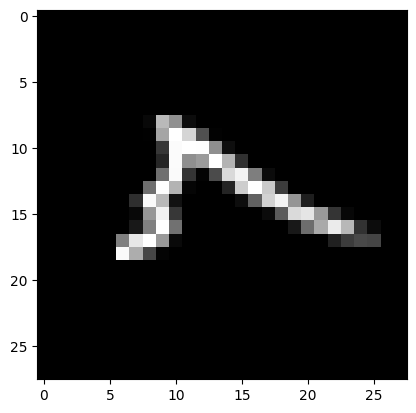

In [20]:
import matplotlib.pyplot as plt
random = np.random.randint(0, 9999)

first_image = X_test[[random, random+1]]
label = Y_test[random].nonzero()[0][0]
prediction = model.predict(first_image)
max_idx = tf.argmax(prediction[0]).numpy()
print(label, max_idx)
first_image = np.array(first_image, dtype='float')
pixels = first_image[0].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()


**ACCURACY PLOT**

Epoch 1/10
300/300 - 3s - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.0835 - val_accuracy: 0.9824 - 3s/epoch - 9ms/step
Epoch 2/10
300/300 - 3s - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0802 - val_accuracy: 0.9824 - 3s/epoch - 10ms/step
Epoch 3/10
300/300 - 3s - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0764 - val_accuracy: 0.9833 - 3s/epoch - 10ms/step
Epoch 4/10
300/300 - 3s - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0910 - val_accuracy: 0.9810 - 3s/epoch - 9ms/step
Epoch 5/10
300/300 - 3s - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0882 - val_accuracy: 0.9814 - 3s/epoch - 9ms/step
Epoch 6/10
300/300 - 3s - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0791 - val_accuracy: 0.9858 - 3s/epoch - 10ms/step
Epoch 7/10
300/300 - 3s - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0839 - val_accuracy: 0.9851 - 3s/epoch - 10ms/step
Epoch 8/10
300/300 - 3s - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0937 - val_accuracy: 0.9837 - 3s/epoch - 10ms/step
Epoch 9/10
300/300 

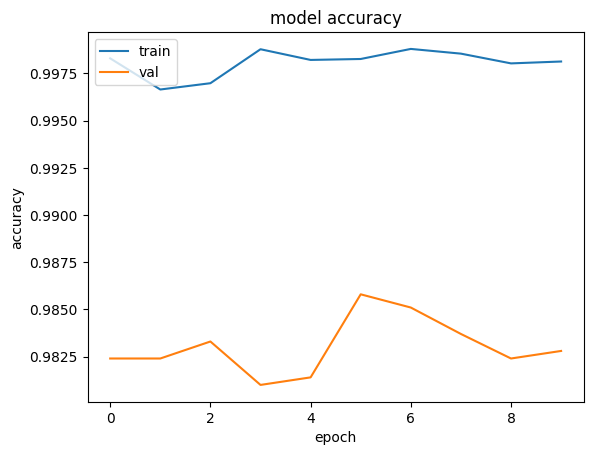

In [21]:
history = model.fit(X_train,Y_train,validation_data=(X_test, Y_test), epochs=10, batch_size=200, verbose=2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**MODEL LOSS PLOT**

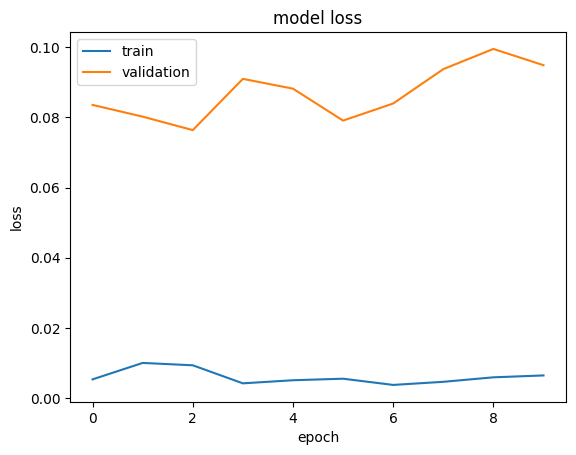

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()